In [1]:
pip install matplotlib  

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install tensorflow-datasets

                                              0.0/5.4 MB ? eta -:--:--
                                              0.0/5.4 MB 660.6 kB/s eta 0:00:09
                                              0.0/5.4 MB 660.6 kB/s eta 0:00:09
                                              0.0/5.4 MB 279.3 kB/s eta 0:00:20
                                              0.1/5.4 MB 476.3 kB/s eta 0:00:12
                                              0.1/5.4 MB 476.3 kB/s eta 0:00:12
                                              0.1/5.4 MB 450.6 kB/s eta 0:00:12
     -                                        0.2/5.4 MB 583.1 kB/s eta 0:00:09
     -                                        0.2/5.4 MB 593.2 kB/s eta 0:00:09
     -                                        0.2/5.4 MB 593.2 kB/s eta 0:00:09
     -                                        0.2/5.4 MB 593.2 kB/s eta 0:00:09
     -                                        0.2/5.4 MB 593.2 kB/s eta 0:00:09
     -                                        0.2


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [7]:

ds = tfds.load('fashion_mnist', split='train', shuffle_files=True)

In [8]:
ds.as_numpy_iterator().next()['label']

2

In [9]:
import numpy as np

In [10]:
dataiterator = ds.as_numpy_iterator()

In [11]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

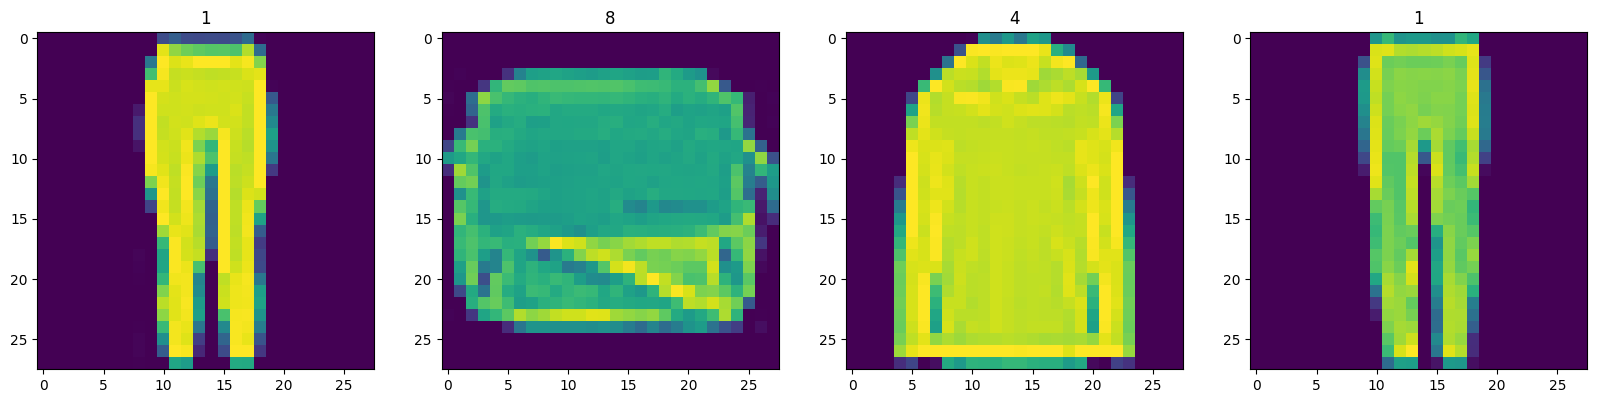

In [12]:
fig, ax = plt.subplots(ncols=4, figsize= (20, 20))
for idx in range(4):
    sample = dataiterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])

In [13]:
def scale_image(data):
    image = data['image']
    return image / 225

In [14]:
ds = tfds.load('fashion_mnist', split='train')
ds = ds.map(scale_image)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)


In [15]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [17]:
def build_generator():
    model = Sequential()
    
    #Beginnings 
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7, 7, 128)))

    #Upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding="same"))
    model.add(LeakyReLU(0.2))

    #Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding="same"))
    model.add(LeakyReLU(0.2))

    #Convolutional block 1
    model.add(Conv2D(128, 4, padding="same"))
    model.add(LeakyReLU(0.2))

    #Convolutional block 2
    model.add(Conv2D(128, 4, padding="same"))
    model.add(LeakyReLU(0.2))

    #Convolutional layer to get to 1 channel
    model.add(Conv2D(1, 4, padding="same", activation='sigmoid'))


    return model

In [18]:
generator = build_generator()

In [19]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

1/1 [==============================] - 1s 524ms/step


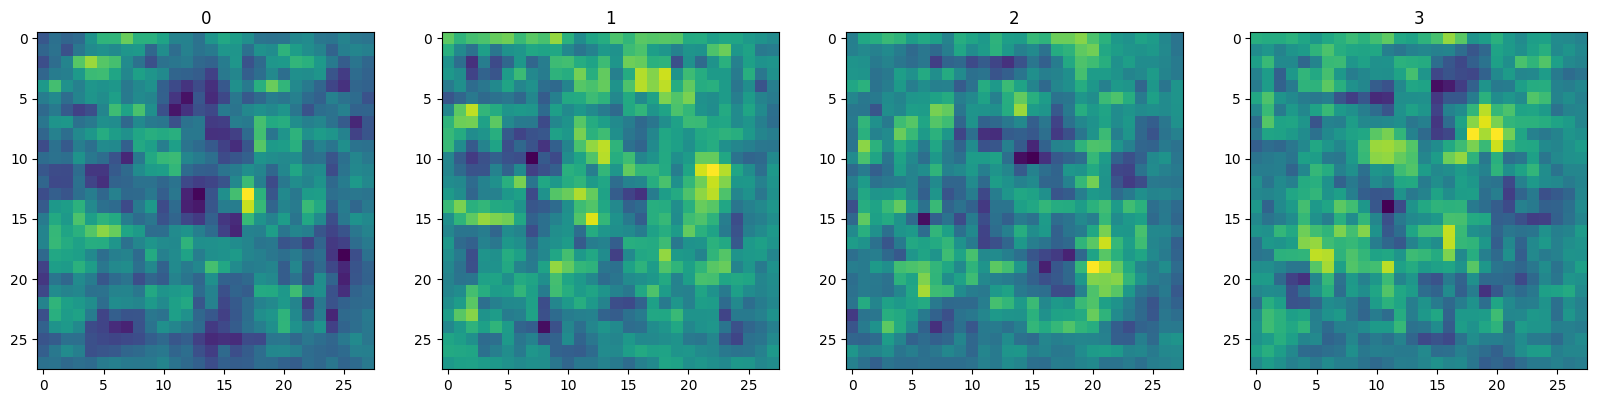

In [20]:
#Generate new fashion
img = generator.predict(np.random.randn(4, 128, 1))

fig, ax = plt.subplots(ncols=4, figsize= (20, 20))
for idx, img in enumerate(img):
    sample = dataiterator.next()
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

In [21]:
img.shape

(28, 28, 1)

In [22]:
def build_discriminator():
    model = Sequential()

    #First Conv Block
    model.add(Conv2D(32, 5, input_shape=(28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))


    return model

In [23]:
discriminator = build_discriminator()

In [24]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [25]:
img = np.reshape(img, (-1, 28, 28, 1))

In [26]:
discriminator.predict(img)

1/1 [==============================] - 0s 329ms/step


array([[0.48816085]], dtype=float32)

In [27]:
# Adam as optimizer for both generator and discriminator
from tensorflow.keras.optimizers import Adam

# Binary cross entropy as loss function for both generator and discriminator
from tensorflow.keras.losses import BinaryCrossentropy

In [28]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [29]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [30]:
class fashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for generator and discriminator
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for generator and discriminator optimizers and losses
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss
    
    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create the labels for real and fake images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSSENTROPY   
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learns from its mistakes
        dgrads = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrads, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128, 128, 1)), training=True)

            # Create the predicted labels for the new images
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick the discriminator into thinking the images are real
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backpropagation
        ggrads = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrads, self.generator.trainable_variables))

        # Return the losses as a dictionary to be monitored by keras
        return {"d_loss": total_d_loss, "g_loss": total_g_loss}

In [31]:
# Create an instance of the subclassed model
fashgan = fashionGAN(generator, discriminator)

In [32]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

In [33]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [34]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim
    
    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
        generated_images = self.model.generator(random_latent_vectors, training=False)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('GANImages', f'generated_img_{epoch}_{i}.png'))

In [35]:
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20


469/469 [==============================] - 11495s 25s/step - d_loss: 0.5216 - g_loss: 0.8265
Epoch 2/20
469/469 [==============================] - 14906s 32s/step - d_loss: 0.3365 - g_loss: 2.2824
Epoch 3/20
469/469 [==============================] - 14426s 31s/step - d_loss: 0.2753 - g_loss: 2.6574
Epoch 4/20
469/469 [==============================] - 14402s 31s/step - d_loss: 0.2815 - g_loss: 2.6562
Epoch 5/20
469/469 [==============================] - 14153s 30s/step - d_loss: 0.6695 - g_loss: 0.7627
Epoch 6/20
469/469 [==============================] - 14368s 31s/step - d_loss: 0.6762 - g_loss: 0.5743
Epoch 7/20
469/469 [==============================] - 14239s 30s/step - d_loss: 0.6805 - g_loss: 0.4779
Epoch 8/20
469/469 [==============================] - 13560s 29s/step - d_loss: 0.7008 - g_loss: 0.5578
Epoch 9/20
469/469 [==============================] - 13610s 29s/step - d_loss: 0.6997 - g_loss: 0.6152
Epoch 10/20
469/469 [==============================] - 13589s 29s/step - d_

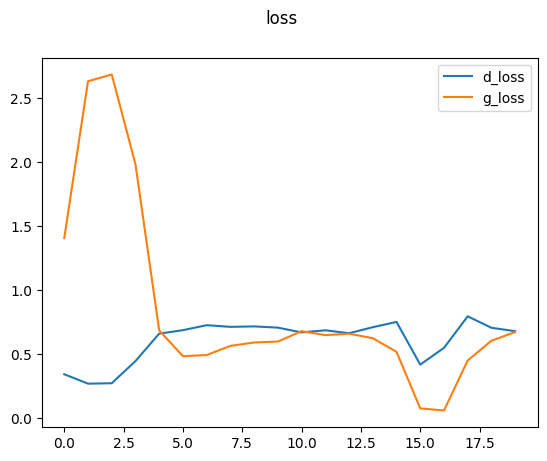

In [37]:
plt.suptitle('loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()

In [38]:
imgs = generator.predict(tf.random.normal((4, 128, 1)))

1/1 [==============================] - 1s 730ms/step


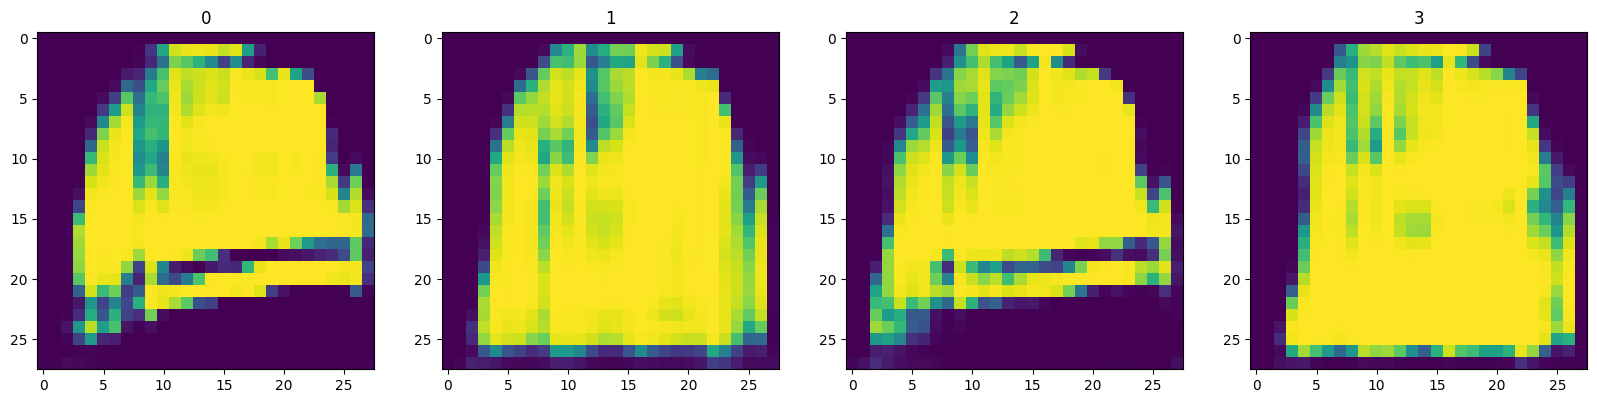

In [39]:
fig, ax = plt.subplots(ncols=4, figsize= (20, 20))
for idx, img in enumerate(imgs):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

In [40]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


FileNotFoundError: [Errno 2] Unable to create file (unable to lock file, errno = 2, error message = 'No such file or directory', Win32 GetLastError() = 1)